# ERA5

imports

In [1]:
import xarray as xr
import intake

Open the catalogue and access the data at once

In [2]:
era5 = intake.open_catalog("../obs_cat/main.yaml")['ERA5']#['phc3']

We can see what is available

In [3]:
print(list(era5))

['era5', 'era5-dkrz']


On Levante, you have access to two ERA5 catalogs. The is more streamlined one, containing monthly data for several chosen variables, accessible with the `era5` key. In addition, you can also access the complete DKRZ GRIB-based original ERA5 catalog using the `era5-dkrz` key. However, it's important to note that there have been some issues with accessing this data occasionally.

In [4]:
era_simple = era5['era5']['monthly'].to_dask()

In [5]:
era_simple

<xarray.Dataset>
Dimensions:  (time: 996, lon: 1440, lat: 721, plev: 8)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * plev     (plev) float64 1e+03 5e+03 1e+04 2.5e+04 5e+04 7e+04 8.5e+04 1e+05
Data variables: (12/16)
    E        (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    MSL      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    Q        (time, plev, lat, lon) float32 dask.array<chunksize=(12, 8, 721, 1440), meta=np.ndarray>
    SLHF     (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    SSHF     (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    SSR      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    ...       ...
    TCC      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    TP       (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    TSR      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    TTR      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    U        (time, plev, lat, lon) float32 dask.array<chunksize=(12, 8, 721, 1440), meta=np.ndarray>
    V        (time, plev, lat, lon) float32 dask.array<chunksize=(12, 8, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu May 25 12:09:12 2023: cdo -O -s -f nc4 -z zip -shifttim...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

In [6]:
era_simple['T2M']

<xarray.DataArray 'T2M' (time: 996, lat: 721, lon: 1440)>
dask.array<open_dataset-6edf34a5a54f76a23322248e66f7ae88T2M, shape=(996, 721, 1440), dtype=float32, chunksize=(12, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Attributes:
    long_name:  2 metre temperature
    units:      K
    code:       167
    table:      128

In [7]:
era_simple.time

<xarray.DataArray 'time' (time: 996)>
array(['1940-01-01T00:00:00.000000000', '1940-02-01T00:00:00.000000000',
       '1940-03-01T00:00:00.000000000', ..., '2022-10-01T00:00:00.000000000',
       '2022-11-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
Attributes:
    standard_name:  time
    axis:           T

In [8]:
%%time
temp_mean = era_simple['T2M'].sel(time=slice('1941', '1950')).mean(dim='time').compute()

CPU times: user 3.36 s, sys: 546 ms, total: 3.91 s
Wall time: 4.39 s


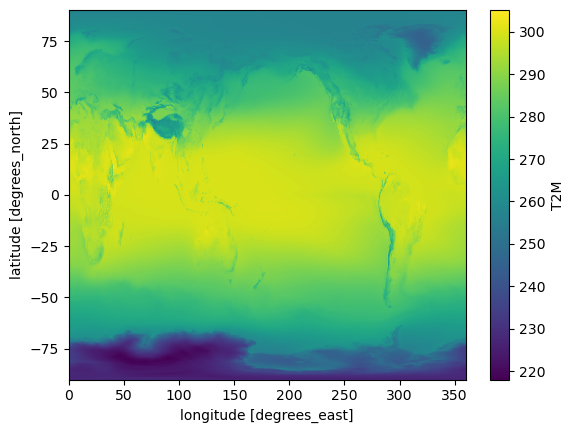

In [9]:
temp_mean.plot()

In [10]:
era_dkrz = era5['era5-dkrz']#['monthly'].to_dask()

In [11]:
print(list(era_dkrz))

['monthly_inst', 'monthly_acc', 'daily_inst', 'daily_acc']


In [12]:
era_dkrz_daily = era_dkrz['daily_acc']

In [ ]:
era_dkrz_daily.search()

In [35]:
era_dkrz_daily

,unique
era_id,3
level_type,3
frequency,3
stepType,4
table_id,2
code,116
short_name,121
validation_date,31498
initialization_date,31499
uri,4236711


In [15]:
fields = ['era_id', 'level_type', 'frequency', 'stepType', 'table_id']
for field in fields:
    unique_values = era_dkrz_daily.df[field].unique()
    print(f'Unique {field} values:', unique_values)

Unique era_id values: ['E1' 'E5' 'ET']
Unique level_type values: ['model_level' 'pressure_level' 'surface']
Unique frequency values: ['hourly' 'daily' 'invariant']
Unique stepType values: ['instant' 'avg' 'max' 'accum']
Unique table_id values: [128 256]


In [39]:
query = dict(
    era_id='E5',  
    level_type='surface', 
    frequency='hourly',
)

In [40]:
cat = era_dkrz_daily.search(**query)

In [41]:
cat.df['short_name'].unique()

array(['siconc', 'asn', 'rsn', 'sst', 'istl1', 'istl2', 'istl3', 'istl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 'sp', 'tcw', 'tcwv', 'stl1',
       'sd', 'msl', 'tcc', 'u10', 'v10', 't2m', 'd2m', 'stl2', 'stl3',
       'lcc', 'mcc', 'hcc', 'src', 'tco3', 'skt', 'stl4', 'tsn', 'fal',
       'fsr', 'flsr', 'u100', 'v100', 'es', 'smlt', 'lspf', 'uvb', 'lsp',
       'cp', 'sf', 'bld', 'sshf', 'slhf', 'ssrd', 'strd', 'ssr', 'str',
       'tsr', 'ttr', 'ewss', 'nsss', 'e', 'lgws', 'mgws', 'gwd', 'ro',
       'tsrc', 'ttrc', 'ssrc', 'strc', 'tisr', 'tp', 'csf', 'lsf',
       'ssrdc', 'strdc', 'fdir', 'cdir', 'pev', 'cape', 'lai_lv',
       'lai_hv', 'tclw', 'tciw', 'blh', 'zust', 'crr', 'lsrr', 'csfr',
       'lssfr', 'cbh', 'i10fg', 'fg10', 'mx2t', 'mn2t'], dtype=object)

In [43]:
# This did not worked, have to fix it
# temp = cat.search(**{"short_name":"t2m"}).to_dataset_dict(cdf_kwargs={"chunks": {"time": 1}})